# i2b2 export analysis (v1)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load data

In [3]:
#declare files
casefile = "/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-infection-500_20230911-044106.csv"
controlfile = "/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-500_20230911-042706.csv"
#controlfile = "/scratch/curtish/hack/i2b2/exports/v3/control/CTRLHENDRX_patient_demographics_RDALEJ_NO_PHI_65679_1.csv"
#casefile = "/scratch/curtish/hack/i2b2/exports/v3/case/casehendx_patient_demographics_RDALEJ_NO_PHI_65669_1.csv"
# load data
case = pd.read_csv(casefile)
control = pd.read_csv(controlfile)

In [5]:
case

,,Patient ID,Sex,Age in Years,Race,Infection due to central venous catheter (ICD10:T80.21),Unnamed: 6
0,1,202928,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
1,2,314213,FEMALE,-1,Black or African American,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
2,3,485745,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
3,4,768783,MALE,-1,White,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN
4,5,834924,FEMALE,58,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
...,...,...,...,...,...,...,...
495,496,2220613,FEMALE,72,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
496,497,2228753,FEMALE,52,Hispanic or Latino,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
497,498,2346020,MALE,30,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
498,499,2468128,MALE,-1,White,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN


# visualize data

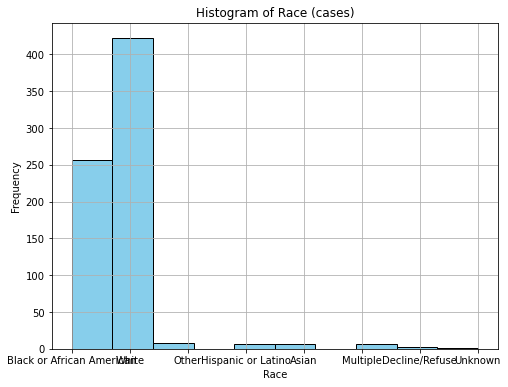

TypeError: 'value' must be an instance of str or bytes, not a float

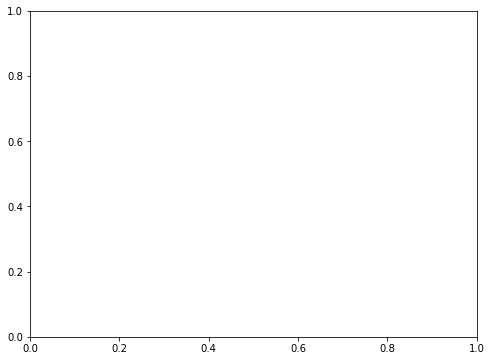

In [31]:
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["RACE"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (cases)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["RACE"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (controls)')
plt.grid(True)
plt.show()

In [33]:
whitecase = case["RACE"].value_counts()['White']
blackcase = case["RACE"].value_counts()['Black or African American']
whitecontrol = control["RACE"].value_counts()['White']
blackcontrol = control["RACE"].value_counts()['Black or African American']

In [34]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [[whitecase, blackcase], [whitecontrol, blackcontrol]]

#            white        black
# Case     casewhite    caseblack
#control   whitecontrol blackcontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.007715333093625749
Dependent (reject H0)


In [37]:
mancase = case["GENDER"].value_counts()['M']
womancase = case["GENDER"].value_counts()['F']
mancontrol = control["GENDER"].value_counts()['M']
womancontrol = control["GENDER"].value_counts()['F']

In [38]:
# defining the table
data = [[mancase, womancase], [mancontrol, womancontrol]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.4759635602224913
Independent (H0 holds true)


In [39]:
case

,MASTER_REQUEST_ID,QUERY_NAME,DE_ID,BIRTH_DATE,GENDER,STATE,ZIP,COUNTRY,CITY,COUNTY,MARITAL_STATUS,RACE,ETHNIC_GROUP,LANGUAGE,RELIGION,LIVING_WILL,DECEASED,DECEASED_DATE,CURRENT_AGE
0,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3933733450,01/02/1987 12:00:00 AM,M,AL,36083,US,TUSKEGEE,Macon,Single,Black or African American,Non-Hispanic/Latino,English,Christian,Unknown,NaN,NaN,36.0
1,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3929980373,09/10/1953 12:00:00 AM,M,AL,36027,US,EUFAULA,Barbour,Married,Black or African American,Non-Hispanic/Latino,English,Baptist,Unknown,NaN,NaN,70.0
2,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3928658953,11/01/1991 12:00:00 AM,F,AL,35214,US,BIRMINGHAM,Jefferson,Single,Black or African American,Non-Hispanic/Latino,English,None,Unknown,NaN,NaN,31.0
3,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3923618228,12/20/1949 12:00:00 AM,M,AL,35226,US,BIRMINGHAM,Jefferson,Married,White,Non-Hispanic/Latino,English,Catholic,Power of Attorney,NaN,NaN,73.0
4,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3928772116,09/08/1961 12:00:00 AM,F,AL,36732,US,DEMOPOLIS,Marengo,Married,White,Non-Hispanic/Latino,English,Methodist,Both,Y,12/12/2014 12:00:00 AM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3925690836,10/19/1992 12:00:00 AM,F,AL,36303,US,DOTHAN,Houston,Single,White,Non-Hispanic/Latino,English,None,None,NaN,NaN,30.0
704,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3929138593,11/20/1941 12:00:00 AM,F,AL,35601,US,DECATUR,Morgan,Married,Black or African American,NaN,English,Unknown,NaN,NaN,NaN,81.0
705,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3929805468,05/26/1960 12:00:00 AM,M,AL,36075,US,SHORTER,Macon,Married,Black or African American,Non-Hispanic/Latino,English,Pentecostal,None,NaN,NaN,63.0
706,65669,Standard Data Request 65669 on 09/11/2023 14:2...,3933202630,04/24/1981 12:00:00 AM,F,TN,37307,US,BENTON,Polk,Married,Decline/Refuse,Non-Hispanic/Latino,English,Christian,Unknown,NaN,NaN,42.0


In [4]:
print(case["Marital Status"].value_counts()['Single'], ' ', case["Marital Status"].value_counts()['Married'], ' ', case["Marital Status"].value_counts()['Separated'], ' ', case["Marital Status"].value_counts()['Divorced'], ' ', case["Marital Status"].value_counts()['Unknown'])

KeyError: 'Marital Status'

In [19]:
print(control["Marital Status"].value_counts()['Single'], ' ', control["Marital Status"].value_counts()['Married'], ' ', control["Marital Status"].value_counts()['Separated'], ' ', control["Marital Status"].value_counts()['Divorced'])

KeyError: 'Marital Status'

In [20]:
# defining the table
data = [[case["Marital Status"].value_counts()['Single'], case["Marital Status"].value_counts()['Married'], case["Marital Status"].value_counts()['Separated'] + case["Marital Status"].value_counts()['Divorced']], [control["Marital Status"].value_counts()['Single'], control["Marital Status"].value_counts()['Married'], control["Marital Status"].value_counts()['Separated'] + control["Marital Status"].value_counts()['Divorced']]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

KeyError: 'Marital Status'

# ML ATTEMPTS

In [21]:
import numpy as np
import csv
from sklearn.utils import Bunch

def load_my_fancy_dataset(file):
    with open(r"/home/nchendri/hold-the-line/i2b2/i2b2-export_patient-central-line-infection-500_20230911-044106.csv") as csv_file:
        data_reader = csv.reader(csv_file)
        feature_names = next(data_reader)[:-1]
        data = []
        target = []
        for row in data_reader:
            features = row[:-1]
            label = row[-1]
            data.append([d for d in features])
            target.append(label)
        
        data = np.array(data)
        target = np.array(target)
    return Bunch(data=data, target=target, feature_names=feature_names)

In [ ]:
ds = load_my_fancy_dataset(casefile)

In [ ]:
features = ds[data]

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features,labels,test_size = 0.40, random_state = 42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
preds = gnb.predict(test)
print(preds)